1. Using Alpha Vantage API to get the stock data, as this API is free to use

    Reference:https://www.alphavantage.co/documentation/

In [48]:
import requests
import json
## setting API keys of Alpha Vantage
api_key = 'ON5BZ9UVB3BC2CCA'

## set the tie series of the data that is needed
function = 'TIME_SERIES_DAILY'

## the comapny name is Microsoft
symbol = 'MSFT'

# url for daily output as much as possible
url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&outputsize=full&apikey={api_key}'

2. Request the data using API and URL and check the status of the request

In [49]:
# send GET request to the Alpha Vantage URL
response = requests.get(url)

# check if the response was successful and raise an exception if not
response.raise_for_status()

# print the response status code
print("Response status code:", response.status_code)

Response status code: 200


3. Save the data from request in json format and also save it in local file

In [50]:
# format the response as JSON and store it in a dictionary variable
stock_data= response.json()

# save the response content to a file
with open("Microsoft.json", "w") as f:
    json.dump(stock_data, f)

# read the response content from the file
with open("Microsoft.json", "r") as f:
    stock_data_loaded = json.load(f)
    assert stock_data == stock_data_loaded
    print(stock_data_loaded)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'MSFT', '3. Last Refreshed': '2023-12-08', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2023-12-08': {'1. open': '369.2000', '2. high': '374.4600', '3. low': '368.2300', '4. close': '374.2300', '5. volume': '20154366'}, '2023-12-07': {'1. open': '368.2300', '2. high': '371.4527', '3. low': '366.3200', '4. close': '370.9500', '5. volume': '23118864'}, '2023-12-06': {'1. open': '373.5400', '2. high': '374.1800', '3. low': '368.0300', '4. close': '368.8000', '5. volume': '21118348'}, '2023-12-05': {'1. open': '366.4500', '2. high': '373.0750', '3. low': '365.6210', '4. close': '372.5200', '5. volume': '23065035'}, '2023-12-04': {'1. open': '369.1000', '2. high': '369.5200', '3. low': '362.9000', '4. close': '369.1400', '5. volume': '32063305'}, '2023-12-01': {'1. open': '376.7600', '2. high': '378.1600', '3. low': '371.3100', '4. close': '374.5100', 

4. As the requests are from all 20 years of data and it does not support only requests certain time periods, so in this section is to filter the data

In [56]:
import pandas as pd
Microsoft_DataFrame=pd.DataFrame(stock_data_loaded["Time Series (Daily)"])
## transpose the dataset
Microsoft_DataFrame=Microsoft_DataFrame.T
##use time as the index of the data
Microsoft_DataFrame.index=pd.to_datetime(Microsoft_DataFrame.index)
##ensure that the data is sort by date
Microsoft_DataFrame.sort_index(inplace=True)
## period of the time as required, from 1-4-2019 to 31-3-2023
start="2019-04-01"
end="2023-03-31"
Data_use=Microsoft_DataFrame.loc[start:end]
print(Data_use["2. high"])

2019-04-01    119.1100
2019-04-02    119.4800
2019-04-03    120.4300
2019-04-04    120.2300
2019-04-05    120.2300
                ...   
2023-03-27    281.4589
2023-03-28    276.1400
2023-03-29    281.1398
2023-03-30    284.4600
2023-03-31    289.2700
Name: 2. high, Length: 1009, dtype: object


5.

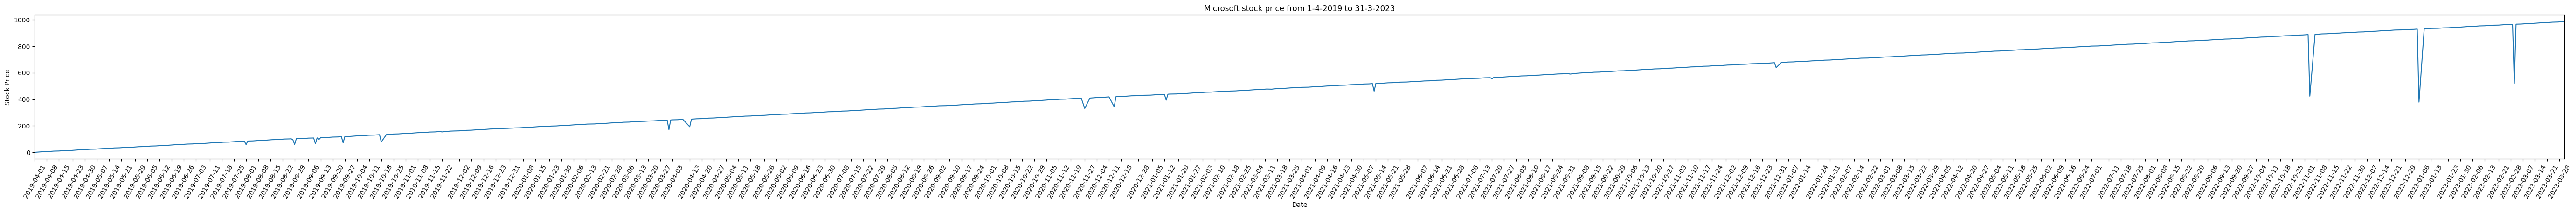

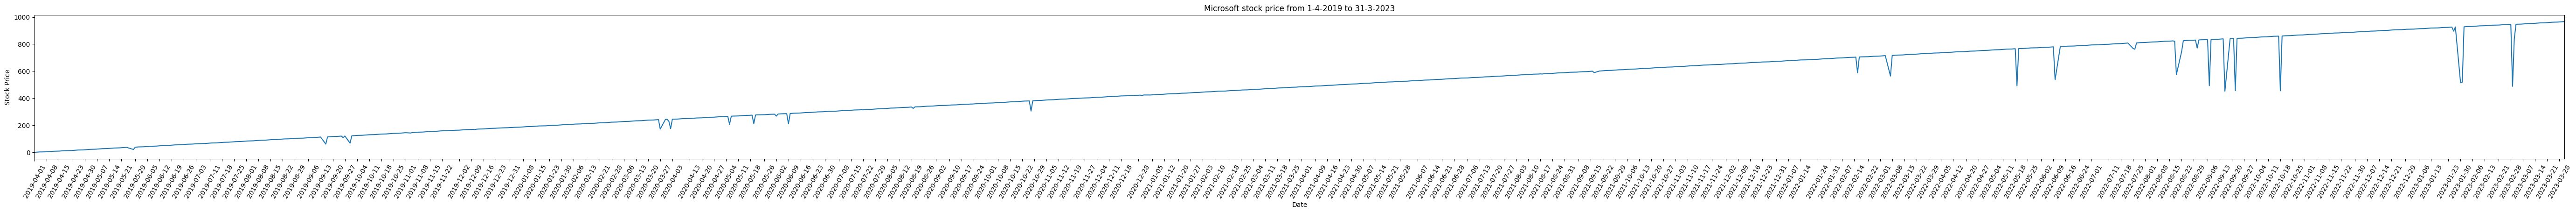

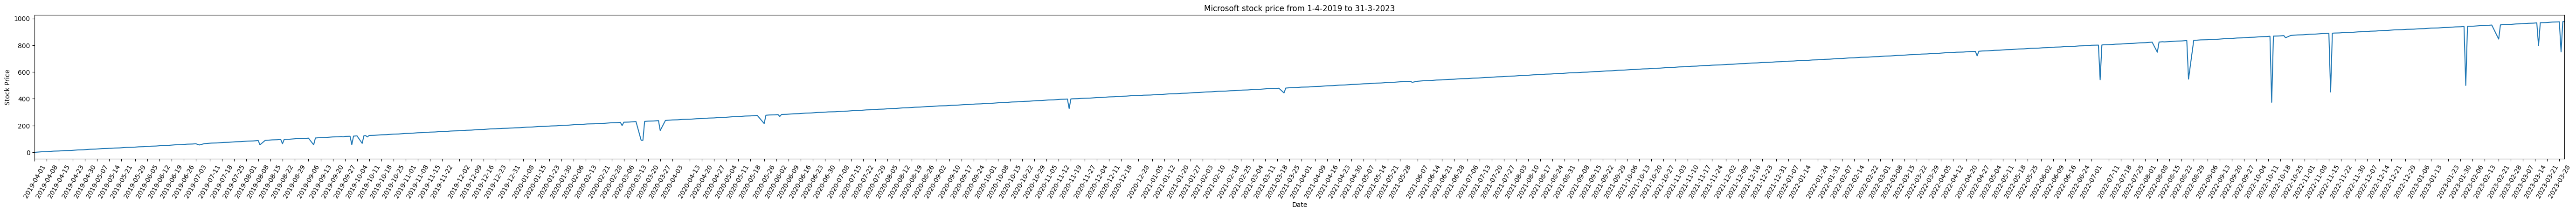

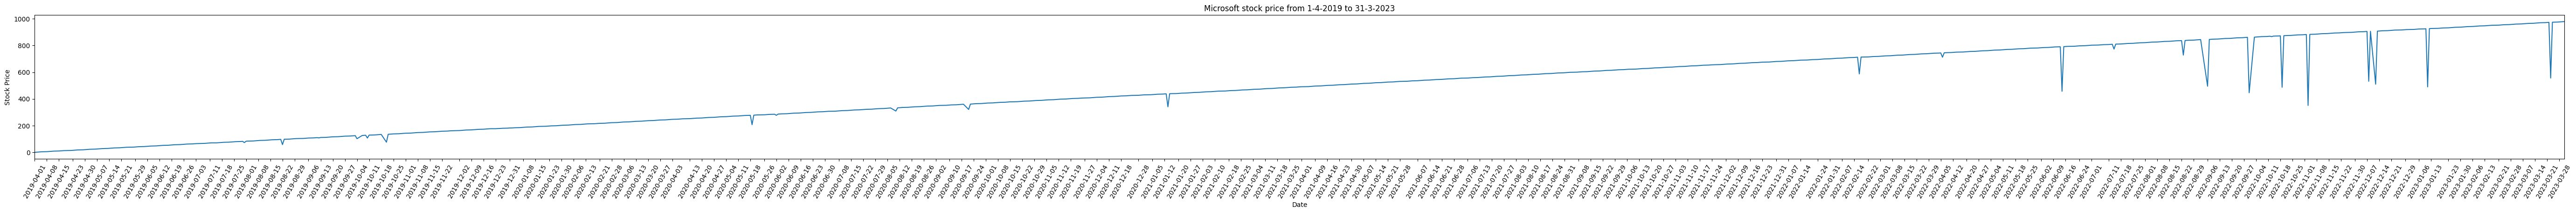

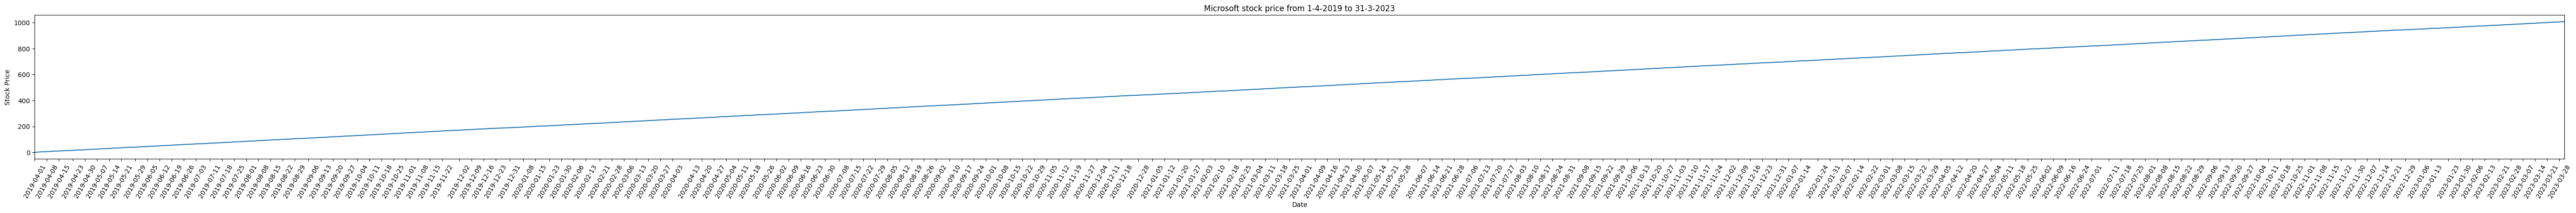